한글 안 깨지게 로딩하는 법 kor

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

%matplotlib inline

In [4]:
# 인코딩 방식 encoding='cp949'
str_sel = pd.read_csv('../big_csv_files/seoul.csv', encoding='cp949')

In [5]:
str_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39926 entries, 0 to 39925
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       39926 non-null  object 
 1   지점       39926 non-null  int64  
 2   평균기온(℃)  39170 non-null  float64
 3   최저기온(℃)  39169 non-null  float64
 4   최고기온(℃)  39168 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


parse_date=True
read_csv()로 날짜데이터(문자열)을 숫자로 인식하게 하기
index_col 을 '날짜' 컬럼으로 지정해야지 문자열이 숫자로 바뀜
!!중요!! index_col=에 날짜로 바꿀 컬럼을 지정하지 않으면 문자열에 숫자로 안 바뀜에 주의

In [6]:
sel_wea = pd.read_csv('../big_csv_files/seoul.csv', encoding='cp949', parse_dates=True, index_col= '날짜')

In [7]:
sel_wea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39926 entries, 1907-10-01 to 2018-03-28
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       39926 non-null  int64  
 1   평균기온(℃)  39170 non-null  float64
 2   최저기온(℃)  39169 non-null  float64
 3   최고기온(℃)  39168 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.5 MB


In [8]:
#가장 더운날 찾기
sel_wea.head(3)

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1907-10-01,108,13.5,7.9,20.7
1907-10-02,108,16.2,7.9,22.0
1907-10-03,108,16.2,13.1,21.3


In [9]:
sel_wea.loc[ sel_wea.iloc[:, 3] == sel_wea.iloc[:, 3].max() , ]

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1994-07-24,108,33.1,28.1,38.4


In [10]:

#sel_wea.describe()
degree4 = np.arange(-16.3, 38.4 + 4.0, 4.0)


In [11]:
degree4

array([-16.3, -12.3,  -8.3,  -4.3,  -0.3,   3.7,   7.7,  11.7,  15.7,
        19.7,  23.7,  27.7,  31.7,  35.7,  39.7])

In [12]:
# 히스토그램 만들기
# 가장 더운 날을 히스토그램으로 만들기

폰트색 바꾸기 plt.xlabel

tick_params() x/y축 색 바꾸기

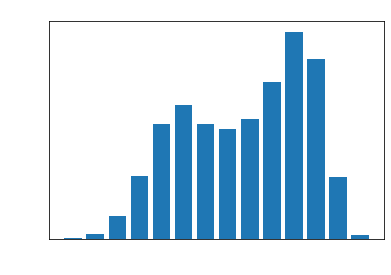

In [52]:
# xlabel, title등에서 사용하기 위해서 
# 딕셔너리 형태로 지정해준 후에
# fontdict= 파라미터로 넘겨준다
# 참고사이트: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/text_fontdict.html
# 사용 예:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#그냥 색만 바꿈
font = {'color' : 'white'}

plt.hist(data=sel_wea, x ='최고기온(℃)', rwidth=0.8, bins=degree4)
# 라벨의 폰트의 색만 바꿀 수 있음
plt.xlabel('test xlabel', fontdict=font)
plt.title('test title', fontdict=font)
plt.ylabel('test ylabel', fontdict=font)

# x,y축의 눈금, 숫자 색 지정
# tick_params() 파라미터 많음
#  labelcolor='w' ---> 눈금의 숫자 색
#  color='w' ---> 눈금의 색
# 참고사이트: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html
plt.tick_params(labelcolor='w', labelsize='medium', color='w', width=3)

plt.show()

sort_values(by=)

In [14]:
# 차트 그리기를 할 때는 정렬을 먼저하는 것이 좋음
# sort_values(by=) 를 한 다음에 변수에 저장

sel_wea_sorted = sel_wea.sort_values(by='최고기온(℃)', ascending=False)

In [15]:
sel_wea_sorted.head(2)

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1994-07-24,108,33.1,28.1,38.4
1943-08-24,108,29.0,23.2,38.2


plt.hist() 차트그리기

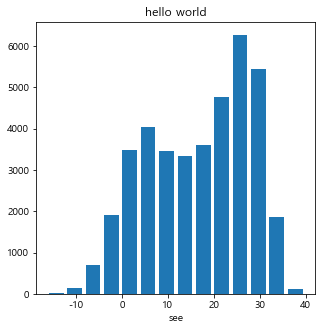

In [51]:
#plt.style.use('Solarize_Light2')
plt.figure(figsize =(5, 5))

plt.hist(data=sel_wea_sorted, x='최고기온(℃)', rwidth=0.8, bins = degree4)
plt.xlabel('see')
plt.title('hello world')
plt.show()


plt.style.available

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [18]:
# 2014년 부터 데이터 기준으로 가져오기
sel_wea.head(5)

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1907-10-01,108,13.5,7.9,20.7
1907-10-02,108,16.2,7.9,22.0
1907-10-03,108,16.2,13.1,21.3
1907-10-04,108,16.5,11.2,22.0
1907-10-05,108,17.6,10.9,25.4


In [19]:
sel_wea.tail()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2018-03-24,108,7.6,4.0,13.1
2018-03-25,108,9.6,4.6,16.9
2018-03-26,108,11.0,5.3,18.1
2018-03-27,108,13.3,7.7,20.0
2018-03-28,108,14.0,9.4,19.0


date가 index(row)인 경우
index속성 이용해서 비교해서 가져오기

In [20]:
# 현재 날짜 컬럼을 index_col 등으로 날짜데이터로 되어 있다면
# 비교로 큰 것들만 가져올 수 있음
# 2014-01-01 이후의 것 들

In [21]:
sel_wea.loc[ sel_wea.index >= '2014-01-01', ]

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2014-01-01,108,4.0,0.3,7.9
2014-01-02,108,1.5,-1.3,6.2
2014-01-03,108,2.3,-1.1,7.3
2014-01-04,108,-0.1,-3.7,5.6
2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...
2018-03-24,108,7.6,4.0,13.1
2018-03-25,108,9.6,4.6,16.9
2018-03-26,108,11.0,5.3,18.1


In [22]:
sel_from2014 = sel_wea.loc[ sel_wea.index >= '2014-01-01', ]

날짜를 index(row) 슬라이싱

In [23]:
# 또는 날짜를 인덱스로 set 만들어서, 슬라이싱 한다
# 이 경우는 날짜가 날짜로 인식이 안되어 있거나, 문자열 이거나
# 인덱스로 지정 후에 특정 날짜 이후로 슬라이싱 함

# 날짜가 숫자로 인식이 안되고 문자열로 인식이 되는 케이스
str_sel_weather = pd.read_csv('../big_csv_files/seoul.csv', encoding='cp949')


In [24]:
#날짜를 인덱스로 고정한다 (row인덱스)
str_sel = str_sel_weather.set_index('날짜')

In [25]:
str_sel.loc['2014-01-01' : , ]

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2014-01-01,108,4.0,0.3,7.9
2014-01-02,108,1.5,-1.3,6.2
2014-01-03,108,2.3,-1.1,7.3
2014-01-04,108,-0.1,-3.7,5.6
2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...
2018-03-24,108,7.6,4.0,13.1
2018-03-25,108,9.6,4.6,16.9
2018-03-26,108,11.0,5.3,18.1


In [26]:
# loc[row, col]  로 row만 슬라이싱으로 끝까지 가져오기
str_sel = str_sel.loc['2014-01-01' : , ]

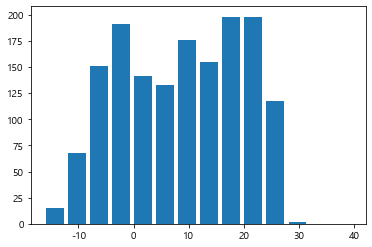

In [27]:
plt.hist(data=str_sel, x='최저기온(℃)', rwidth=0.8, bins= degree4)
plt.show()

to_datetime() 날짜 형식 변환

In [28]:
#날짜가 object로 되어 있음 (문자열)
str_sel_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39926 entries, 0 to 39925
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       39926 non-null  object 
 1   지점       39926 non-null  int64  
 2   평균기온(℃)  39170 non-null  float64
 3   최저기온(℃)  39169 non-null  float64
 4   최고기온(℃)  39168 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [29]:
#to_datetime()
# 판다스의 강력한 object 방식에서 날짜형태로 바꿈
# 문자열(날짜형식)을 datetime64 형식으로 바꿔줌
date_sel = pd.to_datetime(str_sel_weather['날짜'])

dt 속성, year/day등 속성사용

In [30]:
# dt속성 사용하기 
date_sel.dt.year

0        1907
1        1907
2        1907
3        1907
4        1907
         ... 
39921    2018
39922    2018
39923    2018
39924    2018
39925    2018
Name: 날짜, Length: 39926, dtype: int64

In [31]:
# dt속성 month
date_sel.dt.month

0        10
1        10
2        10
3        10
4        10
         ..
39921     3
39922     3
39923     3
39924     3
39925     3
Name: 날짜, Length: 39926, dtype: int64

In [32]:
# 2017-08-01~ 2017-08-15 사이의 날짜별 x축, 최고기온을 y축을 scatter로 나타내시오
sel_wea.head(3)

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1907-10-01,108,13.5,7.9,20.7
1907-10-02,108,16.2,7.9,22.0
1907-10-03,108,16.2,13.1,21.3


In [33]:
sel_oct = sel_wea.loc['2017-08-01' : '2017-08-15' , ]

index 리셋하기 reset_index()

In [34]:
sel_oct.reset_index('날짜', inplace=True)

In [35]:
sel_oct = sel_oct.sort_values(by='최고기온(℃)', ascending=False)

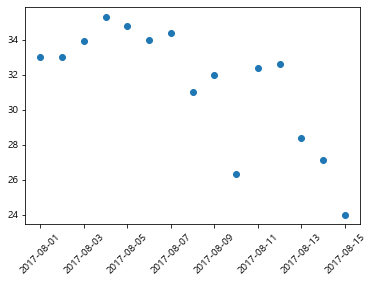

In [36]:
plt.scatter(data=sel_oct, x='날짜', y='최고기온(℃)')
plt.xticks(rotation=45)
plt.show()